In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input/cryptocurrency/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./input/cryptocurrency/coin_Bitcoin.csv
./input/cryptocurrency/coin_Ethereum.csv


In [25]:
df = None
for dirname, _, filenames in os.walk('./input/cryptocurrency/'):
    for filename in filenames:
        
        if filename not in ["coin_Bitcoin.csv", "coin_Ethereum.csv"]:
            continue
    
        raw = pd.read_csv(os.path.join(dirname, filename))
        
        try:
            df = pd.concat([df, pd.DataFrame.from_records(raw)])
        except:
            df = raw
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [27]:
# clean the data, drop the nonsensical headers
df["Increase"] = df["Close"] > df["Open"]
df["Increase"] = df["Increase"].astype(int)
print(df["Increase"])

df["Change"] =  ( df["Close"] - df["Open"] ) / df["Open"]
print(df)

0       1
1       0
2       0
3       0
4       0
       ..
2155    1
2156    1
2157    1
2158    0
2159    1
Name: Increase, Length: 5151, dtype: int32
       SNo      Name Symbol                Date         High          Low  \
0        1   Bitcoin    BTC 2013-04-29 23:59:59   147.488007   134.000000   
1        2   Bitcoin    BTC 2013-04-30 23:59:59   146.929993   134.050003   
2        3   Bitcoin    BTC 2013-05-01 23:59:59   139.889999   107.720001   
3        4   Bitcoin    BTC 2013-05-02 23:59:59   125.599998    92.281898   
4        5   Bitcoin    BTC 2013-05-03 23:59:59   108.127998    79.099998   
...    ...       ...    ...                 ...          ...          ...   
2155  2156  Ethereum    ETH 2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH 2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH 2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH 2021-07-05 23:59:59  2321.922836  2163.041394   


In [28]:
train_data = df.drop(labels=["SNo", "Name", "Symbol", "Date"], axis=1)
train_data

,High,Low,Open,Close,Volume,Marketcap,Increase,Change
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1,0.075094
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,0,-0.034722
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,0,-0.158345
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,0,-0.095979
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,0,-0.080000
...,...,...,...,...,...,...,...,...
2155,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,1,0.019028
2156,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,1,0.035000
2157,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,1,0.042745
2158,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,0,-0.053120


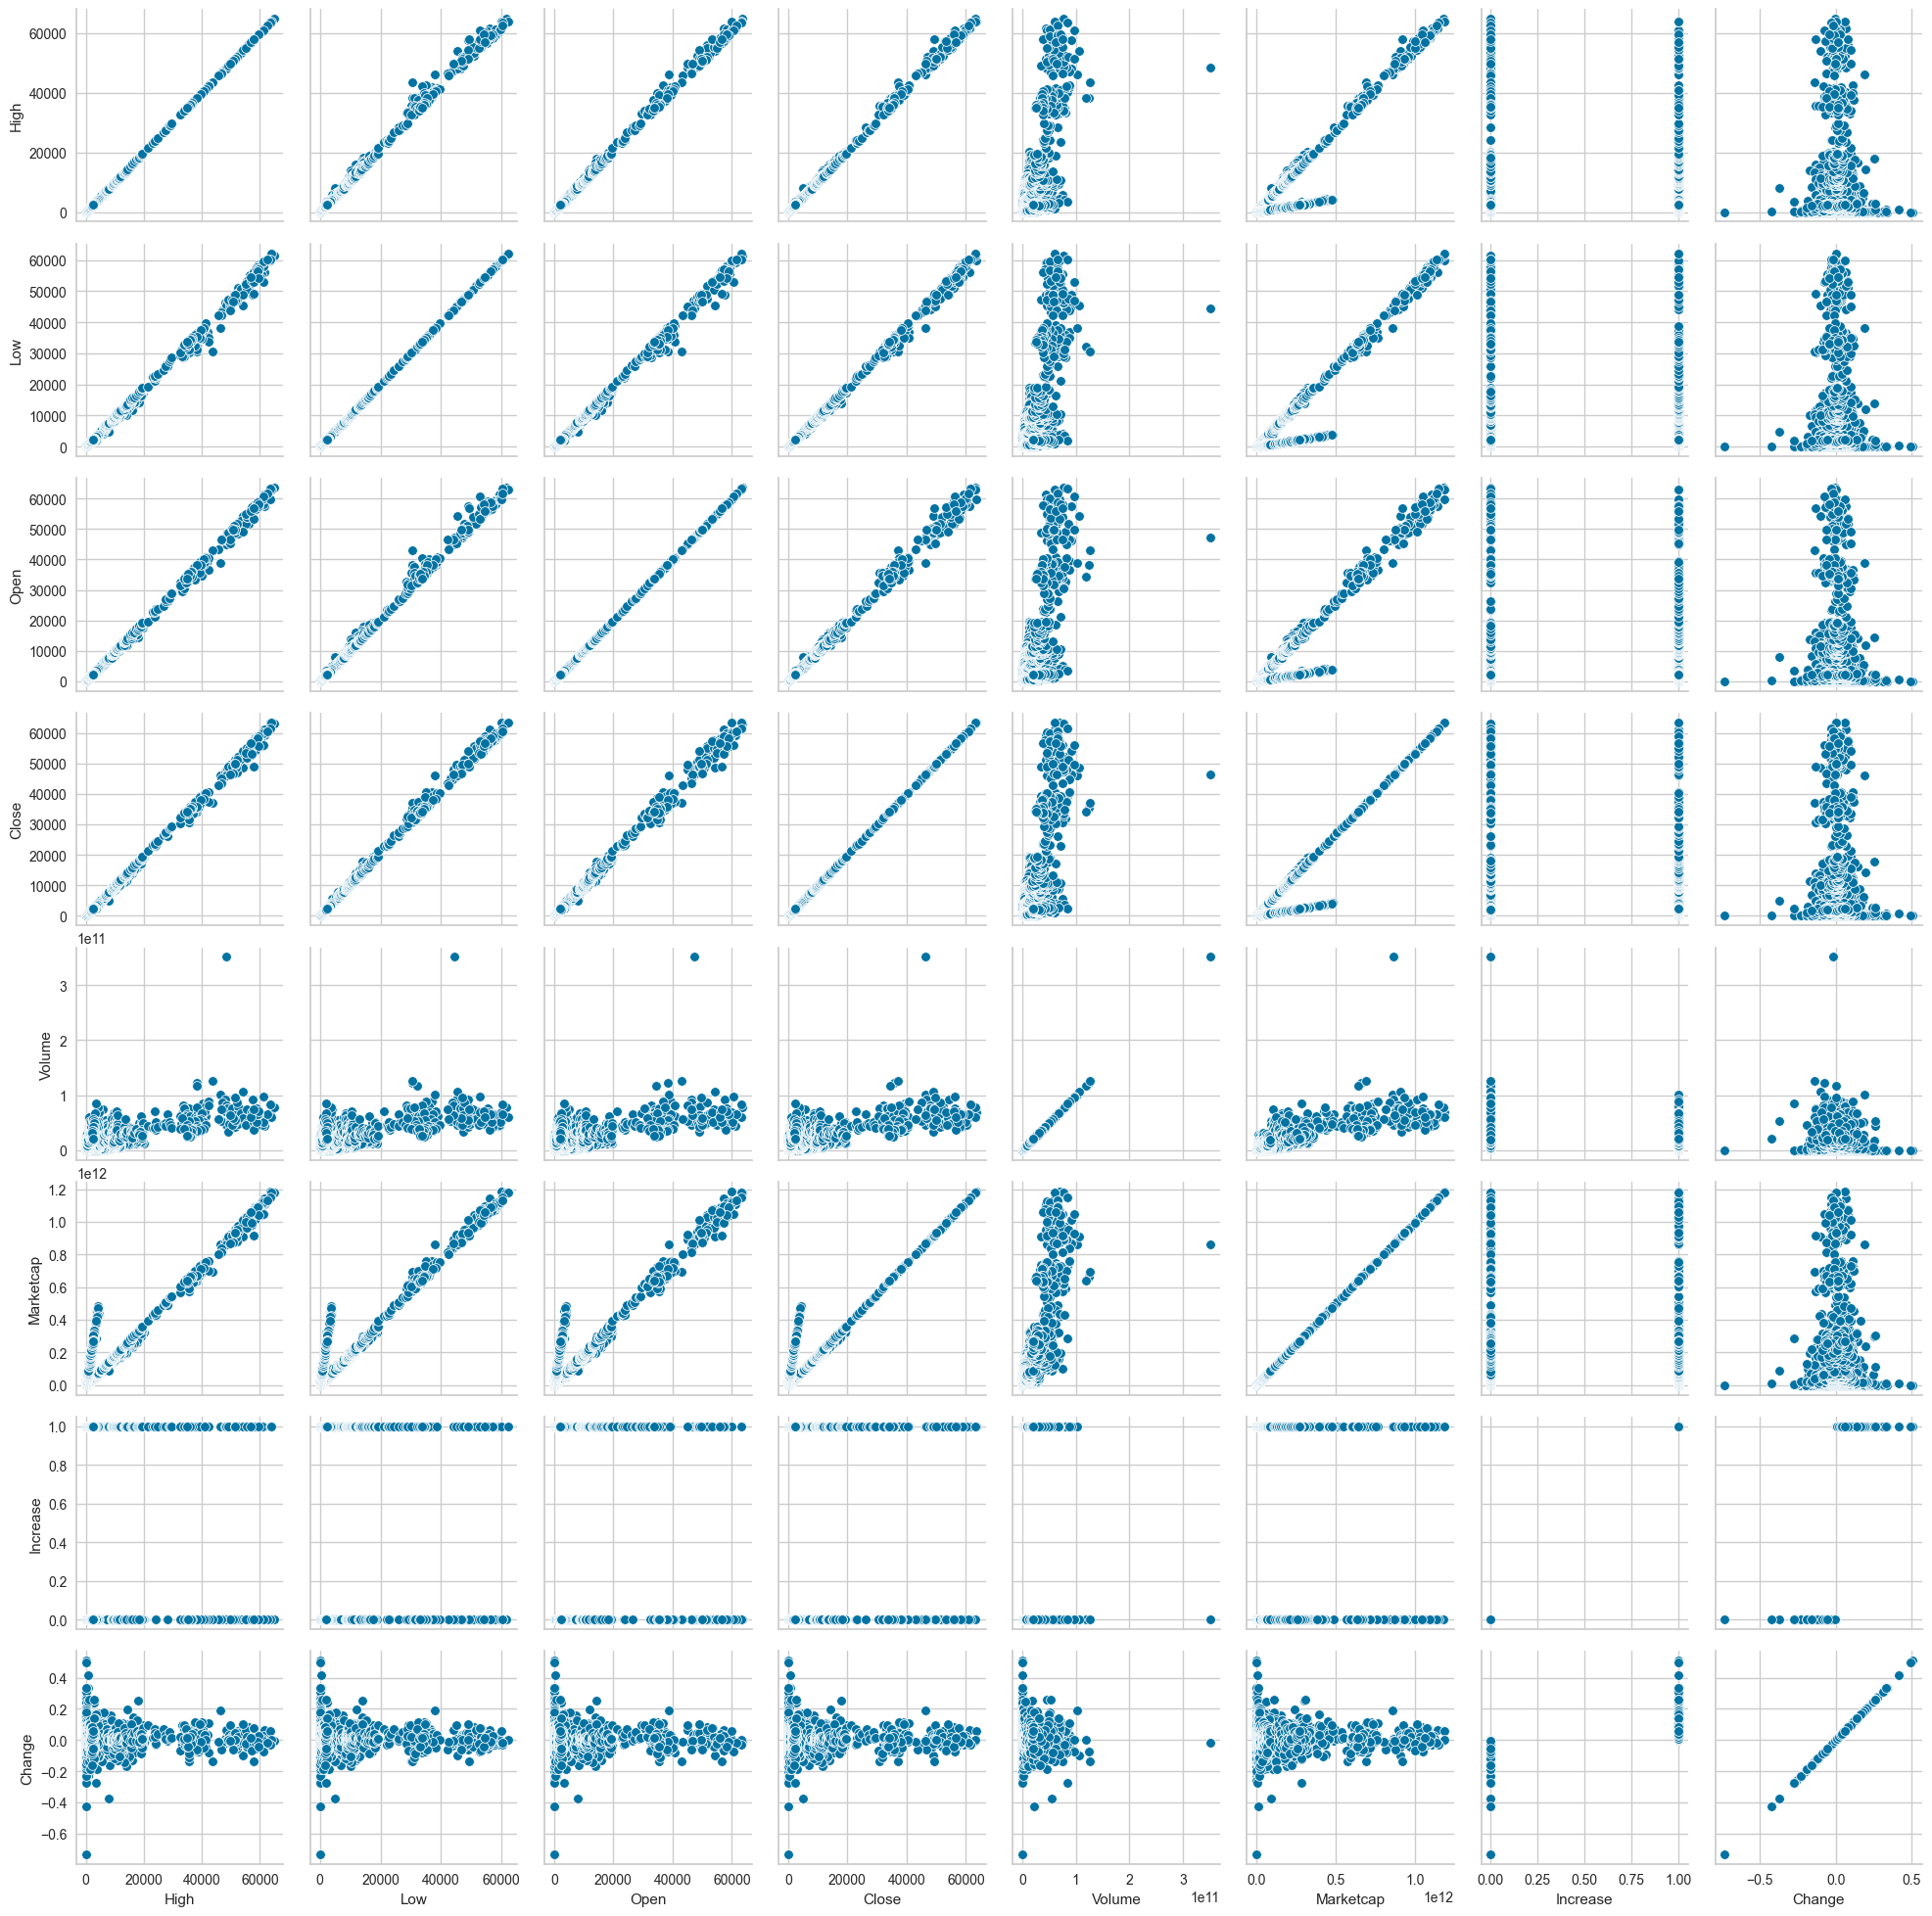

In [29]:
import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)

(array([3.53430578e+02, 1.53286476e+03, 2.58747168e+03, 8.51010592e+03,
       5.70868354e+09, 3.04166426e+11, 7.21629008e-01]), array([7.58739907e-79, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.95610084e-01]))


<AxesSubplot:>

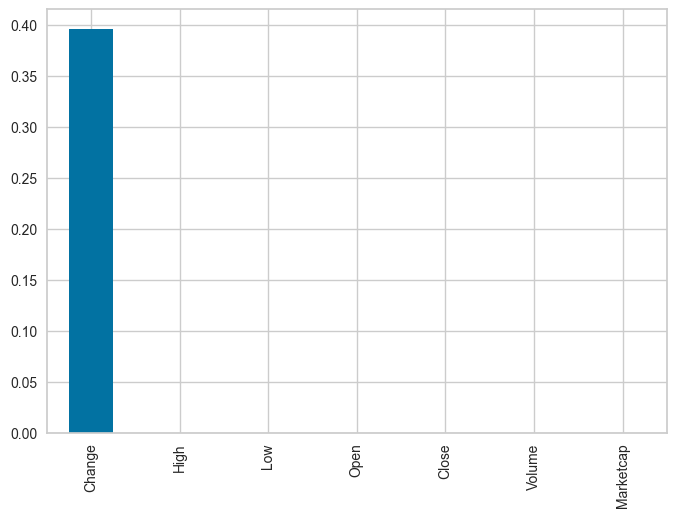

In [30]:
# here use chi2 if features were acceptable
from sklearn.feature_selection import chi2

_train_labels = train_data["Increase"]
_train_data = train_data.drop(labels=["Increase"], axis=1)
_train_data["Change"] = abs(_train_data["Change"]) # 


chi_scores = chi2(_train_data, _train_labels)
print(chi_scores)
p_values = pd.Series(chi_scores[1], index=_train_data.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()


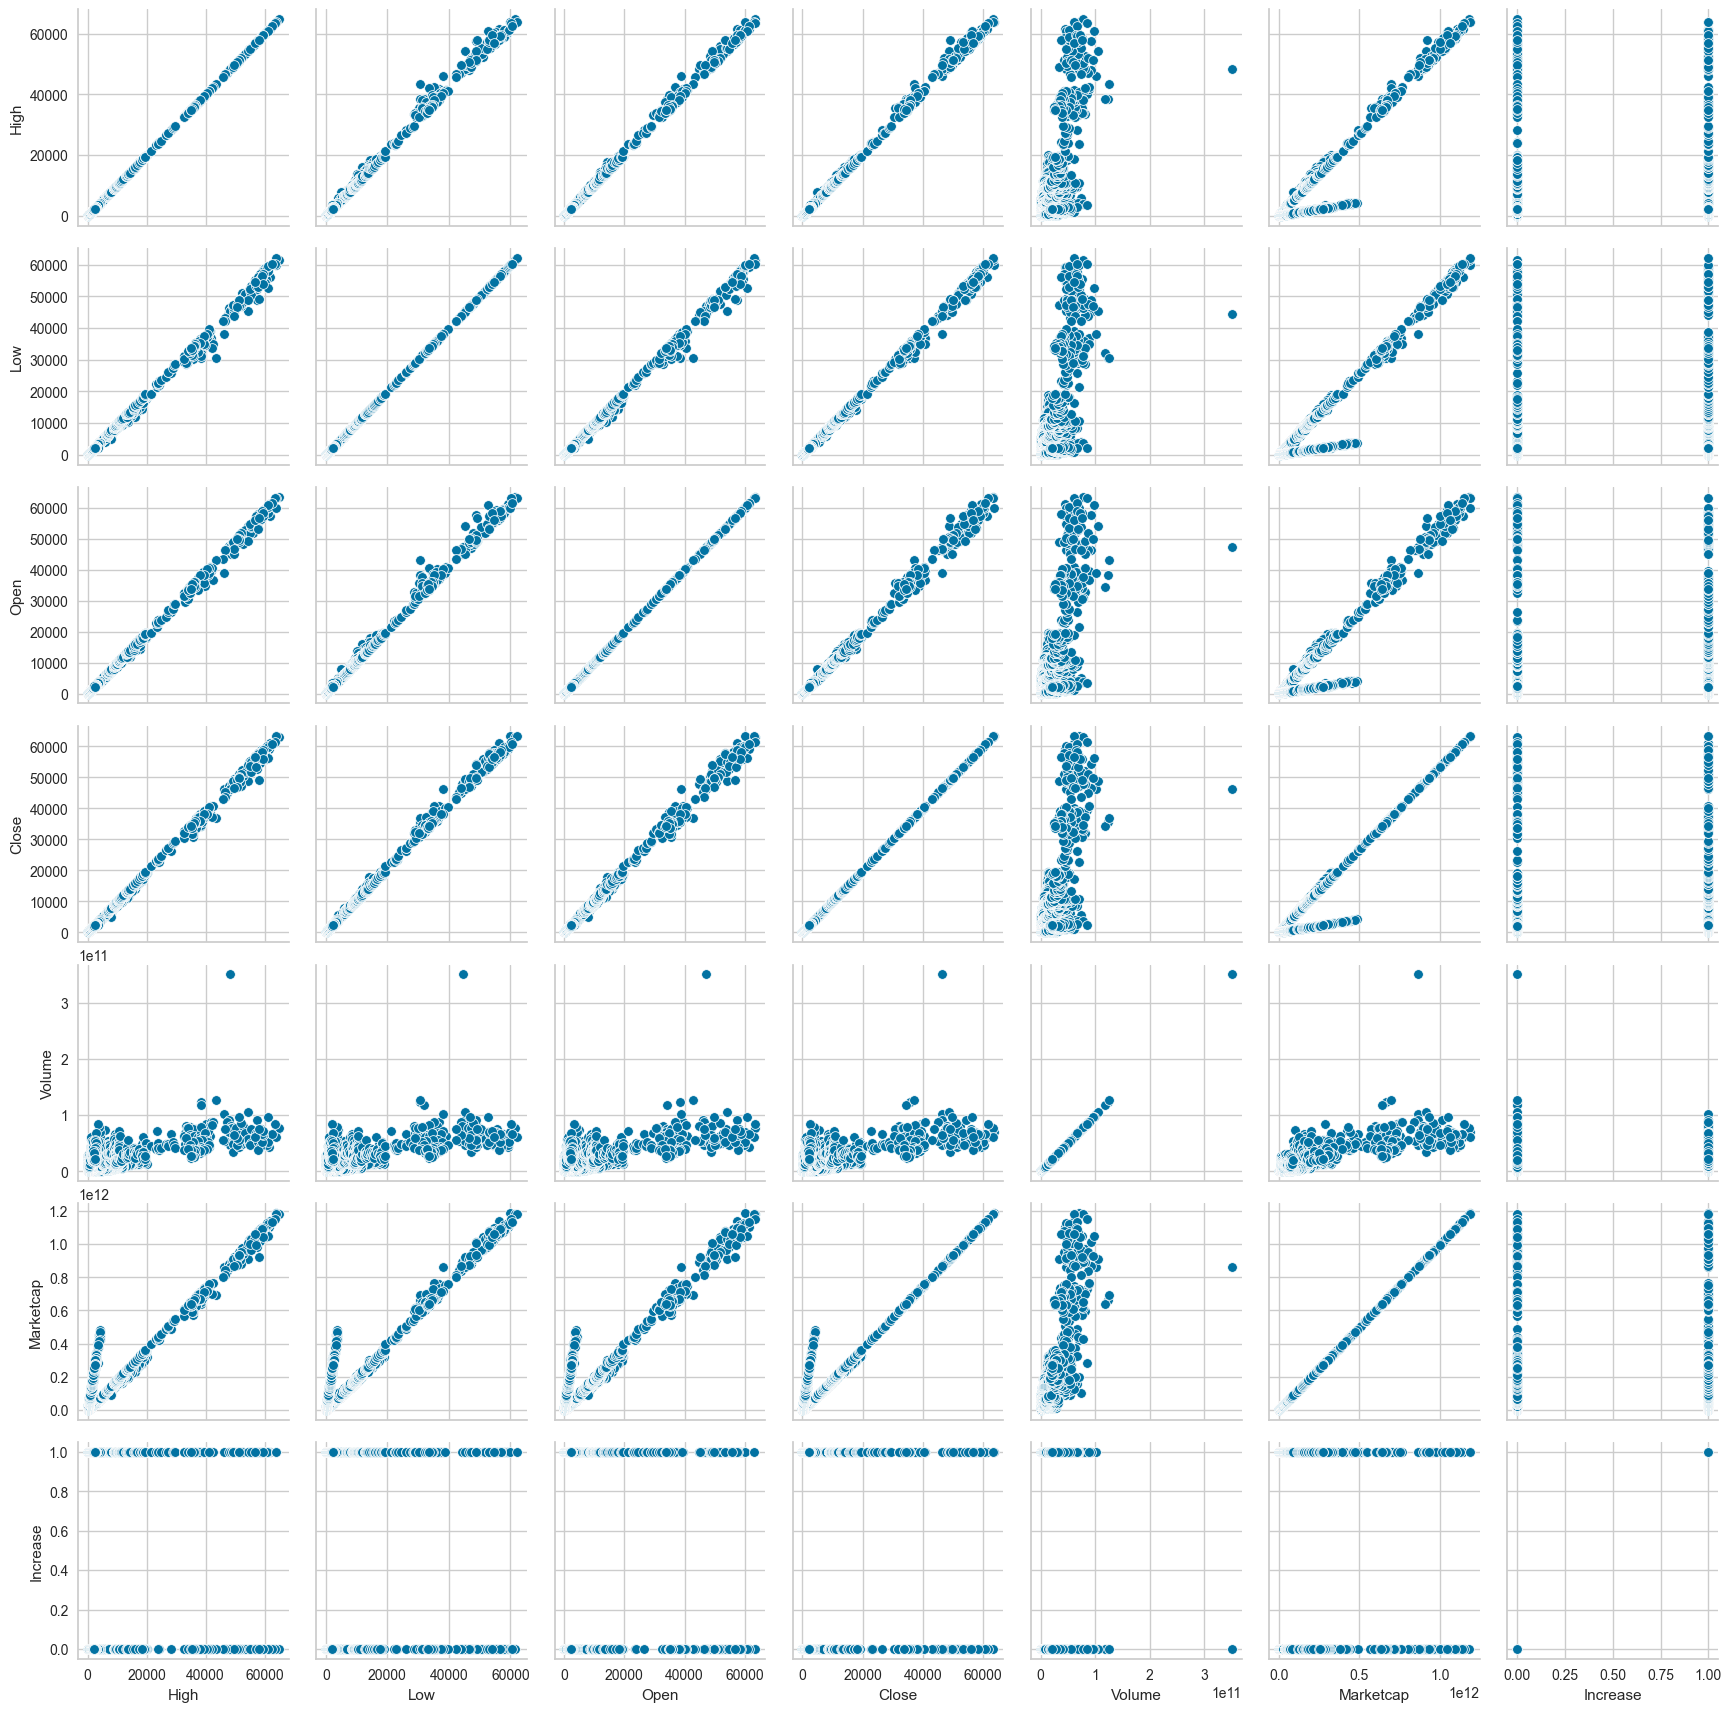

In [31]:
train_data 
train_data = train_data.drop(labels=["Change"], axis=1)
train_data


import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)


In [33]:
train_data["Date"] = df["Date"]
train_data

,High,Low,Open,Close,Volume,Marketcap,Increase,Date
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1,2013-04-29 23:59:59
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,0,2013-04-30 23:59:59
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,0,2013-05-01 23:59:59
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,0,2013-05-02 23:59:59
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,0,2013-05-03 23:59:59
...,...,...,...,...,...,...,...,...
2155,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,1,2021-07-02 23:59:59
2156,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,1,2021-07-03 23:59:59
2157,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,1,2021-07-04 23:59:59
2158,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,0,2021-07-05 23:59:59


In [34]:
# lazy, it should be a datetime frs it was a string just filter out those 2021
test_data = train_data[train_data["Date"].dt.year >= 2021]
X = train_data[train_data["Date"].dt.year < 2021]

X = X.sort_values(by="Date")
test_data = test_data.sort_values(by="Date")

print(X)
print(test_data)

              High           Low          Open         Close        Volume  \
0       147.488007    134.000000    134.444000    144.539993  0.000000e+00   
1       146.929993    134.050003    144.000000    139.000000  0.000000e+00   
2       139.889999    107.720001    139.000000    116.989998  0.000000e+00   
3       125.599998     92.281898    116.379997    105.209999  0.000000e+00   
4       108.127998     79.099998    106.250000     97.750000  0.000000e+00   
...            ...           ...           ...           ...           ...   
1970    737.952903    692.149438    730.358684    731.520119  1.871068e+10   
2802  28937.740004  27360.089709  27360.089709  28840.953420  5.128744e+10   
1971    754.303234    720.988875    731.472845    751.618972  1.729457e+10   
2803  29244.876688  28201.991994  28841.573758  29001.719822  4.675496e+10   
1972    754.299440    726.511908    751.626643    737.803398  1.392685e+10   

         Marketcap  Increase                Date  
0     1.6037

In [35]:
X_y = X["Marketcap"]

X = X.drop(labels=["Increase","Date", "Marketcap",], axis=1)

test_y = test_data["Marketcap"]
test_data = test_data.drop(labels=["Increase", "Date", "Marketcap",], axis=1)

X_y

0       1.603769e+09
1       1.542813e+09
2       1.298955e+09
3       1.168517e+09
4       1.085995e+09
            ...     
1970    8.342033e+10
2802    5.360338e+11
1971    8.572258e+10
2803    5.390511e+11
1972    8.415681e+10
Name: Marketcap, Length: 4777, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

LR.fit(X, X_y)

LinearRegression()

In [52]:
LR.score(test_data, test_y)

0.8105517354407638

In [53]:
from sklearn.metrics import mean_absolute_error
ypred = LR.predict(test_data)
mean_absolute_error(test_y, ypred)

130734959536.50595

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


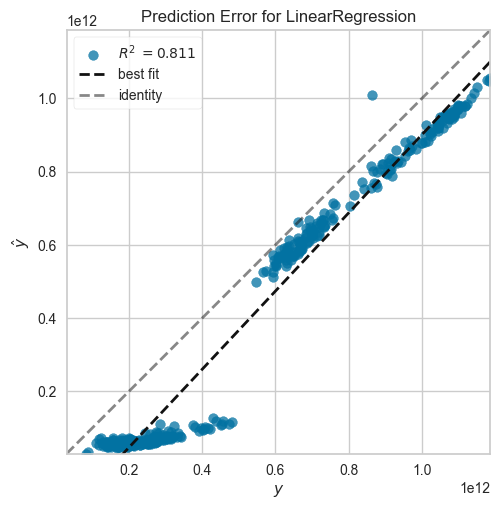

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [54]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(LR)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


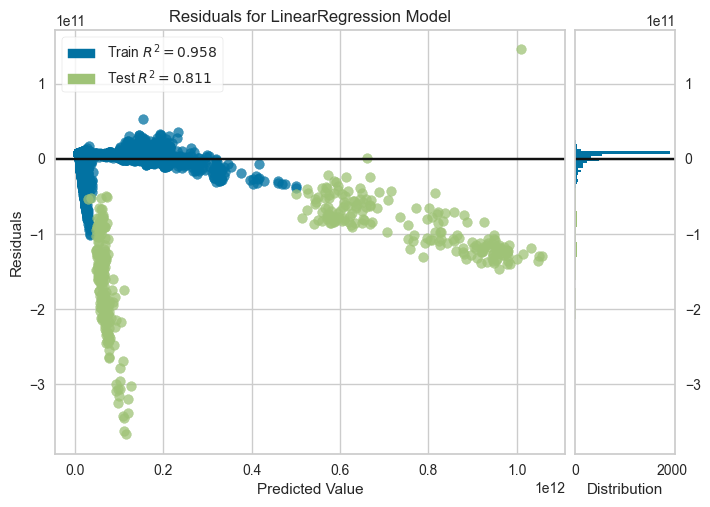

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [55]:
visualizer = ResidualsPlot(LR)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

def confusion_mtx(model, Y, predict):
    disp = ConfusionMatrixDisplay.from_predictions(
        Y,
        predict,
    )
    plt.show()
# does not work, I believe due to the labels not really discrete. Works on classifier mostly with 2 labels only unlike marketcap prediction
confusion_mtx(LR, test_y, LR.predict(test_data))

ValueError: Unknown label type: (2804    5.460016e+11
1973    8.331854e+10
1974    8.836761e+10
2805    5.972059e+11
2806    6.094092e+11
            ...     
2988    6.615748e+11
2158    2.562978e+11
2989    6.326962e+11
2990    6.418992e+11
2159    2.710286e+11
Name: Marketcap, Length: 374, dtype: float64, array([4.99604497e+11, 3.01193640e+10, 3.57877373e+10, 5.58323136e+11,
       5.70871668e+11, 5.94219061e+10, 5.72753087e+11, 6.94967083e+10,
       5.95477458e+11, 5.85532005e+10, 6.29651658e+10, 6.46119814e+11,
       5.94103207e+10, 6.87432745e+11, 6.28467606e+10, 7.15195096e+11,
       5.46670190e+10, 6.83762250e+11, 5.99902407e+10, 6.59818028e+11,
       7.35721290e+10, 6.62032630e+11, 5.38464058e+10, 5.85946614e+11,
       6.49091813e+11, 4.99400390e+10, 6.67988104e+11, 5.37924490e+10,
       5.49674621e+10, 6.28965664e+11, 5.28475856e+10, 6.10988262e+11,
       6.08649230e+11, 5.05914145e+10, 6.18556263e+11, 4.84418412e+10,
       6.07449008e+11, 6.71608374e+10, 6.74755003e+10, 6.18315356e+11,
       5.28037661e+11, 6.12241003e+10, 5.85246811e+11, 6.26139536e+10,
       5.42853973e+11, 4.88732121e+10, 5.50166643e+11, 5.90385425e+10,
       5.44674159e+11, 6.29100624e+10, 6.27332049e+10, 5.68265143e+11,
       5.87723553e+10, 5.26387878e+11, 5.65628387e+10, 5.91616352e+11,
       7.27124881e+10, 6.14160832e+11, 5.96276929e+11, 5.40417165e+10,
       5.65007665e+11, 4.84766337e+10, 5.75986883e+11, 5.29181685e+10,
       6.81127243e+10, 6.12053477e+11, 6.77167367e+10, 6.44273214e+11,
       6.31820697e+11, 6.82394857e+10, 6.52738365e+11, 6.68802877e+10,
       6.60587400e+10, 6.68187009e+11, 6.69070646e+11, 6.52109675e+10,
       7.39459070e+10, 8.14659780e+11, 7.09810468e+10, 8.00859444e+11,
       6.86124147e+10, 7.71141745e+11, 6.47960747e+10, 8.21282299e+11,
       8.07859799e+11, 6.73078187e+10, 7.98005857e+11, 6.45602181e+10,
       8.22526696e+11, 6.12294995e+10, 8.19804625e+11, 6.70821276e+10,
       6.32061487e+10, 8.33682971e+11, 8.87228922e+11, 6.59125410e+10,
       8.56135642e+11, 6.08867969e+10, 9.34236601e+11, 5.97629587e+10,
       9.33845824e+11, 6.53395018e+10, 9.45835716e+11, 5.69687002e+10,
       9.26279107e+11, 6.97030278e+10, 7.38722392e+10, 8.38273118e+11,
       8.29391408e+11, 5.80925248e+10, 4.95650475e+10, 7.58074155e+11,
       5.51624693e+10, 1.00934280e+12, 7.54918228e+11, 4.69309867e+10,
       5.22973813e+10, 7.52989036e+11, 8.27297060e+11, 5.16843989e+10,
       4.87980496e+10, 7.96307196e+11, 5.02217678e+10, 8.26989593e+11,
       7.93070324e+11, 4.99716864e+10, 4.89275689e+10, 8.14696928e+11,
       5.19935541e+10, 8.03974598e+11, 5.40028574e+10, 8.43271850e+11,
       5.89873881e+10, 8.68997864e+11, 9.08315220e+11, 5.60848849e+10,
       9.25337868e+11, 5.59752689e+10, 9.60440213e+11, 5.58160125e+10,
       5.33877293e+10, 9.51797476e+11, 1.01510382e+12, 5.81318740e+10,
       9.59187052e+11, 5.20569465e+10, 9.10672881e+11, 5.65685494e+10,
       5.54475578e+10, 9.51263348e+11, 9.83352896e+11, 5.61774918e+10,
       5.42863344e+10, 9.52802032e+11, 9.55388393e+11, 5.33241811e+10,
       9.48961233e+11, 5.40365683e+10, 9.46887214e+11, 5.42140043e+10,
       8.84919045e+11, 5.26925150e+10, 9.03751317e+11, 5.15631831e+10,
       5.71284213e+10, 8.61920722e+11, 8.64260392e+11, 5.66073920e+10,
       5.26713161e+10, 9.17304093e+11, 4.92265256e+10, 9.20353992e+11,
       9.19977272e+11, 4.74884193e+10, 9.56277936e+11, 5.45795548e+10,
       5.48399687e+10, 9.71815094e+11, 6.21825357e+10, 9.78898612e+11,
       9.80775305e+11, 6.36965472e+10, 9.79336471e+11, 6.95293650e+10,
       9.43382479e+11, 6.48425387e+10, 6.15133055e+10, 9.69154383e+11,
       9.78197306e+11, 6.40640205e+10, 9.66679759e+11, 6.44808532e+10,
       9.32550310e+11, 6.70600955e+10, 6.09585150e+10, 9.64654779e+11,
       5.60894029e+10, 9.53925822e+11, 9.80383130e+11, 6.09807235e+10,
       5.74692106e+10, 9.85192698e+11, 5.84970198e+10, 9.78875890e+11,
       6.74674589e+10, 1.05710422e+12, 7.46544320e+10, 1.05026324e+12,
       7.32682110e+10, 1.04718926e+12, 7.47647494e+10, 1.03233698e+12,
       6.97445010e+10, 1.00017194e+12, 9.48727499e+11, 8.37166065e+10,
       9.24045426e+11, 6.87932486e+10, 9.48118636e+11, 7.63233732e+10,
       7.57440604e+10, 8.81330462e+11, 8.58706713e+11, 8.70841552e+10,
       8.80120593e+11, 8.98127388e+10, 8.28565232e+11, 6.74896613e+10,
       8.08082513e+11, 6.96044978e+10, 8.99114827e+11, 7.59791210e+10,
       7.56183437e+10, 9.08597201e+11, 8.97333729e+11, 7.86948709e+10,
       8.77860546e+11, 7.72032109e+10, 9.54282039e+11, 7.52157741e+10,
       9.45168616e+11, 7.71507052e+10, 9.20104610e+11, 7.66542124e+10,
       1.01169396e+11, 9.31876511e+11, 1.07843248e+11, 8.78466385e+11,
       1.02020491e+11, 9.59828073e+11, 9.37266755e+11, 9.78498270e+10,
       9.54490959e+11, 9.40461201e+10, 9.77574276e+11, 1.09247872e+11,
       1.10301987e+11, 9.71628649e+11, 1.19165071e+11, 9.22548006e+11,
       9.47392366e+11, 1.16075854e+11, 1.19499663e+11, 7.88524345e+11,
       8.58967656e+11, 1.27751659e+11, 8.24077826e+11, 1.09990780e+11,
       7.65763221e+11, 9.63764821e+10, 7.68363582e+11, 1.00764303e+11,
       1.01736321e+11, 7.36696024e+11, 9.20952496e+10, 7.05442668e+11,
       6.68333375e+11, 1.10675920e+11, 1.05169663e+11, 7.08531356e+11,
       6.37410211e+11, 8.70568190e+10, 6.36868272e+11, 7.70170877e+10,
       6.03762936e+11, 8.54214947e+10, 9.24379440e+10, 6.59675251e+11,
       9.05999729e+10, 6.49475557e+11, 8.73927309e+10, 6.54318008e+11,
       6.34701585e+11, 7.70779536e+10, 5.96133057e+11, 7.64101926e+10,
       6.90777240e+10, 5.70985831e+11, 5.89096436e+11, 6.57097287e+10,
       6.26327967e+11, 7.56134033e+10, 6.04686104e+11, 7.07693817e+10,
       7.20335827e+10, 6.19693609e+11, 6.49270469e+11, 7.66130935e+10,
       7.69564224e+10, 6.09878213e+11, 7.25277745e+10, 5.80126854e+11,
       7.05864525e+10, 5.89029700e+11, 5.41289242e+11, 7.14423488e+10,
       5.74237276e+11, 8.10315795e+10, 6.36761440e+11, 7.79448686e+10,
       6.90356101e+10, 6.09002377e+11, 6.23351101e+11, 6.39860247e+10,
       6.53762538e+10, 5.87316961e+11, 6.52626491e+11, 6.88133202e+10,
       6.89049517e+10, 6.67304229e+11, 6.73388488e+11, 7.21041647e+10,
       6.33666638e+10, 6.28212945e+11, 6.20785370e+10, 6.24684139e+11,
       6.05506072e+10, 5.85931141e+11, 5.86627646e+11, 5.64436843e+10,
       6.12394353e+10, 5.98952567e+11, 6.27094191e+10, 5.25836810e+11,
       6.54341439e+10, 5.64987869e+11, 5.67117609e+11, 6.16213418e+10,
       5.51571427e+10, 5.76127999e+11, 5.34727552e+10, 5.13957734e+11,
       5.31632627e+10, 5.43002166e+11, 5.48652036e+10, 5.79519157e+11,
       6.05525249e+10, 5.70400925e+11, 6.10650398e+10, 5.95436953e+11,
       6.43986966e+10, 5.80645444e+11, 5.58181196e+11, 6.36254679e+10,
       6.73634249e+10, 5.71691502e+11, 5.67076673e+10, 5.69718889e+11,
       5.89046588e+10, 5.76227348e+11, 5.78893668e+10, 5.51105941e+11,
       5.59476906e+11, 6.08944615e+10]))

In [ ]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(X, X_y)
ypred=Ls.predict(test_data)
Ls.score(test_data, test_y)

In [42]:
from sklearn.metrics import mean_absolute_error
ypred = Ls.predict(test_data)
mean_absolute_error(test_y, ypred)

130839662660.52821

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


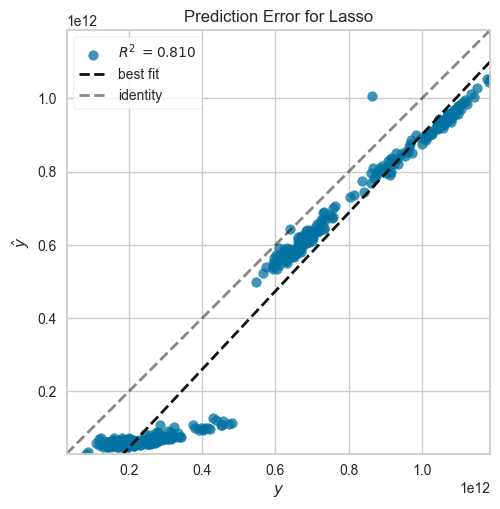

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [44]:
visualizer = PredictionError(Ls)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


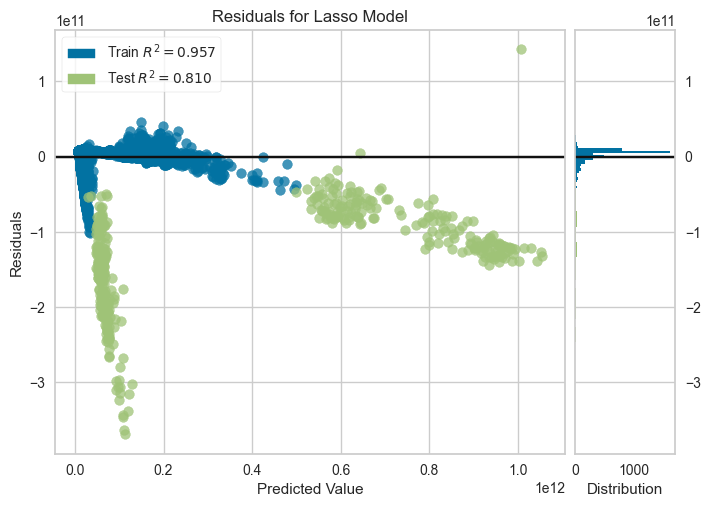

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
visualizer = ResidualsPlot(Ls)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [61]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor()
mytre.fit(X, X_y)
ypred=mytre.predict(test_data)
mytre.score(test_data, test_y)

0.24033583552155624

In [62]:
from sklearn.metrics import mean_absolute_error
ypred = mytre.predict(test_data)
mean_absolute_error(test_y, ypred)

241947583827.25806

In [65]:
from sklearn import tree
print(tree.export_text(mytre))

|--- feature_3 <= 5540.49
|   |--- feature_4 <= 499714016.00
|   |   |--- feature_3 <= 283.71
|   |   |   |--- feature_4 <= 381168000.00
|   |   |   |   |--- feature_3 <= 21.03
|   |   |   |   |   |--- feature_0 <= 6.98
|   |   |   |   |   |   |--- feature_2 <= 2.88
|   |   |   |   |   |   |   |--- feature_3 <= 1.90
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.08
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.77
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- feature_3 >  0.77
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.92
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.92
|   |   |   |   |   |   